In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:\\Users\\thora\\CustomerChurn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.shape

(7043, 21)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.drop('customerID', axis = 1 , inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
df1 = df.copy()

In [12]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors = 'coerce')

In [13]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [16]:
pd.to_numeric(df['TotalCharges'],errors = 'coerce')[488]

nan

In [17]:
df1.dropna(inplace = True)

In [18]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df1.shape

(7032, 20)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [21]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [22]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
for i in df1:
    print(i,":",df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [24]:
df1.replace('No phone service','No',inplace = True)

In [25]:
df1.replace('No internet service','No',inplace = True)

In [26]:
for i in df1:
    print(i,":",df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [27]:
df1.replace({'Yes':1,'No':0,},inplace = True)

In [28]:
df1.replace({'Female':0,'Male':1,},inplace = True)

In [29]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [30]:
for i in df1:
    print(i,":",df1[i].unique())

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [31]:
final = pd.get_dummies(data = df1,drop_first = True)

In [32]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [33]:
final['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

In [34]:
final[final['Churn']== 0].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [35]:
tenure0 = final[final['Churn']== 0].tenure

In [36]:
tenure0

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [37]:
tenure1 = final[final['Churn']== 1].tenure

In [38]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Tenure Analysis')

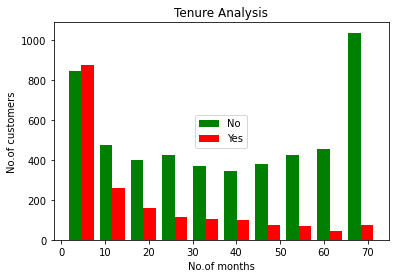

In [39]:
plt.hist([tenure0,tenure1],color = ['green','red'],label = ['No','Yes'])
plt.xlabel('No.of months')
plt.ylabel('No.of customers')
plt.legend(loc = 'center')
plt.title('Tenure Analysis')

Text(0.5, 1.0, 'MonthlyCharges Analysis')

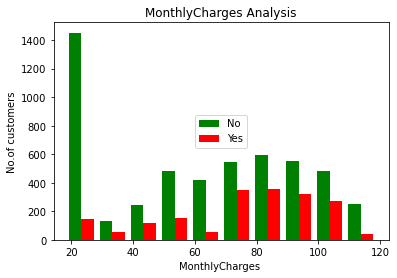

In [40]:
MonthlyCharges0 = final[final['Churn']== 0].MonthlyCharges 
MonthlyCharges1 = final[final['Churn']== 1].MonthlyCharges 
plt.hist([MonthlyCharges0,MonthlyCharges1],color = ['green','red'],label = ['No','Yes'])
plt.xlabel('MonthlyCharges ')
plt.ylabel('No.of customers')
plt.legend(loc = 'center')
plt.title('MonthlyCharges Analysis')

In [41]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [42]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [43]:
X = final.drop("Churn",axis = 1)

In [44]:
y = final.Churn

In [45]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,84.80,1990.50,1,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,1,103.20,7362.90,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,29.60,346.45,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,1,74.40,306.60,0,1,0,0,0,0,1


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
scaled = scaler.fit_transform(X)
scaled

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [49]:
scaled.shape

(7032, 23)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
X_train.shape

(5625, 23)

In [53]:
X_test.shape

(1407, 23)

In [54]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape =(23,),activation ="sigmoid")
])

In [55]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics= ['Accuracy'])

In [56]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 67.6637 - Accuracy: 0.7515
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 14.2897 - Accuracy: 0.6318
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 5.9754 - Accuracy: 0.5353
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 3.4180 - Accuracy: 0.5449
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 1.2741 - Accuracy: 0.6121
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.5430 - Accuracy: 0.7682
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4954 - Accuracy: 0.7820
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4816 - Accuracy: 0.7815
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4828 - Accuracy: 0.7833
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4732 - Accu

176/176 [==============================] - 0s 2ms/step - loss: 0.4460 - Accuracy: 0.7979
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4340 - Accuracy: 0.8002
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4289 - Accuracy: 0.7989
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4472 - Accuracy: 0.7972
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4398 - Accuracy: 0.8007
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4532 - Accuracy: 0.7932
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4528 - Accuracy: 0.7940
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4677 - Accuracy: 0.7868
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4464 - Accuracy: 0.7950
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4525 - Accuracy: 

In [57]:
model = keras.Sequential([
    keras.layers.Dense(50,input_shape = (23,),activation = "relu",kernel_initializer='ones',bias_initializer= 'zeros'),
    keras.layers.Dense(1,activation = "sigmoid")
])

In [58]:
model.compile(optimizer='adam',
    loss="binary_crossentropy",
    metrics=['Accuracy'])

In [59]:
model.fit(X_train,y_train,epochs= 100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 93.9643 - Accuracy: 0.6462
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 8.1968 - Accuracy: 0.7024
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 5.3145 - Accuracy: 0.7271
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 7.0826 - Accuracy: 0.7260
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 4.6189 - Accuracy: 0.7285
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 8.0336 - Accuracy: 0.7159
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 6.6781 - Accuracy: 0.7260
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 7.8492 - Accuracy: 0.7301
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 5.5837 - Accuracy: 0.7392
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 4.3806 - Accur

176/176 [==============================] - 0s 2ms/step - loss: 4.1883 - Accuracy: 0.7524
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 5.0956 - Accuracy: 0.7495
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 3.2549 - Accuracy: 0.7518
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 4.9980 - Accuracy: 0.7374
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 2.8849 - Accuracy: 0.7566
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 4.3021 - Accuracy: 0.7452
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 4.1170 - Accuracy: 0.7481
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 2.9433 - Accuracy: 0.7614
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 4.8927 - Accuracy: 0.7367
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 6.6206 - Accuracy: 

In [60]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 6.3386 - Accuracy: 0.7832


[6.338637351989746, 0.783226728439331]

In [61]:
predicted = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [62]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = predicted)

In [63]:
import seaborn as sns

<AxesSubplot:>

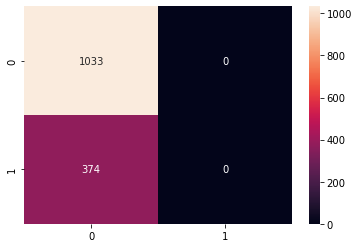

In [64]:
sns.heatmap(cm, annot = True, fmt = 'd')

In [91]:
sum1, sum0 =final['Churn'].value_counts()

In [92]:
sum0

1869

In [93]:
sum1

5163

In [66]:
df0 = final[final['Churn']==0]

In [67]:
df0.shape

(5163, 24)

In [68]:
df1 = final[final['Churn']==1]

In [95]:
df1.shape

(1869, 24)

In [ ]:
# Minority sample technique

In [99]:
df1_oversample = df1.sample(sum1,replace = True )

In [100]:
df1_oversample.shape

(5163, 24)

In [96]:
df0_undersample = df0.sample(sum0)

In [97]:
df0_undersample.shape

(1869, 24)

In [72]:
undersample = pd.concat([df1,df0_undersample])

In [73]:
undersample

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,0,1,0,0,0,1,0
8,0,0,1,0,28,1,1,0,0,1,...,104.80,3046.05,1,0,1,0,0,0,1,0
13,1,0,0,0,49,1,1,0,1,1,...,103.70,5036.30,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,1,0,1,1,71,1,0,0,0,0,...,19.60,1387.45,0,0,0,0,1,0,0,0
2122,0,0,0,0,12,1,1,0,0,0,...,75.85,854.45,0,1,0,1,0,0,0,1
2971,0,0,1,1,59,1,1,1,1,1,...,90.30,5194.05,0,1,0,0,1,1,0,0
5986,1,1,0,0,11,1,0,0,0,0,...,79.15,827.70,0,0,1,0,0,1,0,0


In [74]:
undersample.shape

(3738, 24)

In [75]:
undersample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 2 to 4016
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3738 non-null   int64  
 1   SeniorCitizen                          3738 non-null   int64  
 2   Partner                                3738 non-null   int64  
 3   Dependents                             3738 non-null   int64  
 4   tenure                                 3738 non-null   int64  
 5   PhoneService                           3738 non-null   int64  
 6   MultipleLines                          3738 non-null   int64  
 7   OnlineSecurity                         3738 non-null   int64  
 8   OnlineBackup                           3738 non-null   int64  
 9   DeviceProtection                       3738 non-null   int64  
 10  TechSupport                            3738 non-null   int64  
 11  Stre

In [76]:
col_scale = undersample[['tenure','MonthlyCharges','TotalCharges']]

In [77]:
undersample[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(col_scale)

In [78]:
undersample

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.352735,0.010305,1,1,0,0,0,0,0,1
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.521826,0.015324,1,0,1,0,0,0,1,0
5,0,0,0,0,0.098592,1,1,0,0,1,...,0.812343,0.092506,1,0,1,0,0,0,1,0
8,0,0,1,0,0.380282,1,1,0,0,1,...,0.864024,0.349321,1,0,1,0,0,0,1,0
13,1,0,0,0,0.676056,1,1,0,1,1,...,0.852985,0.578984,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,1,0,1,1,0.985915,1,0,0,0,0,...,0.009032,0.157928,0,0,0,0,1,0,0,0
2122,0,0,0,0,0.154930,1,1,0,0,0,...,0.573507,0.096423,0,1,0,1,0,0,0,1
2971,0,0,1,1,0.816901,1,1,1,1,1,...,0.718515,0.597188,0,1,0,0,1,1,0,0
5986,1,1,0,0,0.140845,1,0,0,0,0,...,0.606623,0.093337,0,0,1,0,0,1,0,0


In [102]:
!pip install imbalanced_learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [103]:
from imblearn.over_sampling import SMOTE

In [ ]:
1869 minority 1
5169 majority

In [110]:
smote = SMOTE(sampling_strategy = "minority")

In [111]:
smote

SMOTE(sampling_strategy='minority')

In [115]:
X = final.drop('Churn', axis = 1)
y = final.Churn

In [116]:
X_sm, y_sm = smote.fit_resample(X,y)

In [117]:
X_sm.shape

(10326, 23)

In [118]:
y_sm.shape

(10326,)

In [119]:
( X_train, X_test, y_train, y_test) = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [121]:
X_train.shape

(8260, 23)

In [122]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape =(23,),activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid"),
])

In [123]:
model.compile(optimizer='adam',
    loss="binary_crossentropy",
    metrics=['Accuracy'])

In [124]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
259/259 [==============================] - 1s 964us/step - loss: 8.2572 - Accuracy: 0.5771
Epoch 2/50
259/259 [==============================] - 0s 935us/step - loss: 0.9455 - Accuracy: 0.7234
Epoch 3/50
259/259 [==============================] - 0s 906us/step - loss: 0.7551 - Accuracy: 0.7507
Epoch 4/50
259/259 [==============================] - 0s 803us/step - loss: 0.8875 - Accuracy: 0.7502
Epoch 5/50
259/259 [==============================] - 0s 837us/step - loss: 0.7641 - Accuracy: 0.7690
Epoch 6/50
259/259 [==============================] - 0s 878us/step - loss: 0.5964 - Accuracy: 0.7895
Epoch 7/50
259/259 [==============================] - 0s 863us/step - loss: 0.6471 - Accuracy: 0.7816
Epoch 8/50
259/259 [==============================] - 0s 828us/step - loss: 0.5480 - Accuracy: 0.7912
Epoch 9/50
259/259 [==============================] - 0s 851us/step - loss: 0.5905 - Accuracy: 0.7903
Epoch 10/50
259/259 [==============================] - 0s 830us/step - loss: 0.549

In [125]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 859us/step - loss: 0.9595 - Accuracy: 0.7691


[0.9595298171043396, 0.7691190838813782]

In [126]:
y_pred = model.predict(X_test)
l1 = []
for i in y_pred:
    if i > 0.5:
        l1.append(1)
    else:
        l1.append(0)

65/65 [==============================] - 0s 664us/step


In [128]:
print(Classification_report(y_test,l1))

NameError: name 'Classification_report' is not defined

65/65 [==============================] - 0s 782us/step


<AxesSubplot:>

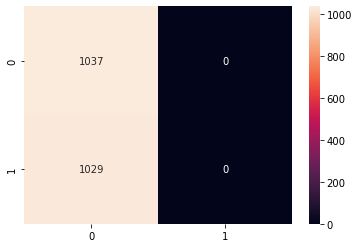

In [129]:
y_pred = model.predict(X_test)
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred)
import seaborn as sns
sns.heatmap(cm, annot = True, fmt = 'd')

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr = LogisticRegression()
lr.fit(X_train_min,y_train_min)


LogisticRegression()

In [86]:
lr.score(X_train_min,y_train_min)

0.7687699680511182

In [87]:
lr_predict = lr.predict(X_test_min)

In [88]:
cm = tf.math.confusion_matrix(labels = y_test_min,predictions = lr_predict)

In [89]:
import seaborn as sns

<AxesSubplot:>

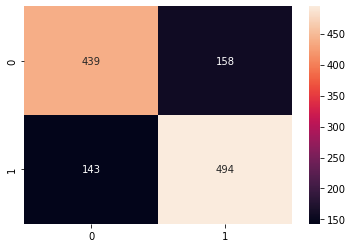

In [90]:
sns.heatmap(cm,annot = True,fmt = 'd')